In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from lightkurve import TessLightCurve, KeplerLightCurve, search_lightcurvefile

Download observations from TESS, Kepler

In [6]:
kepler = search_lightcurvefile('HAT-P-11', mission='Kepler', cadence='short')
kepler_collection = kepler.download_all()

In [3]:
tess = search_lightcurvefile('HAT-P-11', mission='TESS', cadence='short')
tess_collection = tess.download_all()

In [48]:
def my_custom_corrector_func(lc):
    corrected_lc = lc.normalize().remove_outliers(sigma=4).remove_nans()#.flatten(window_length=10001)
    return corrected_lc

In [49]:
tes = tess_collection.SAP_FLUX.stitch(my_custom_corrector_func)
kep = kepler_collection.SAP_FLUX.stitch(my_custom_corrector_func)

In [50]:
period = 4.88780258
t0 = 2454605.89146

In [51]:
from toolkit.planet_params import hat11_params_morris

In [62]:
from toolkit import LightCurve, concatenate_transit_light_curves

h11 = hat11_params_morris()
kepler_lcs = LightCurve(kep.time + 2454833, kep.flux)
kepler_masked = LightCurve(**kepler_lcs.mask_out_of_transit(h11, oot_duration_fraction=0.5))
kepler_transits = kepler_masked.get_transit_light_curves(h11)

for lc in kepler_transits:
    lc.remove_polynomial_baseline(h11)

kepler_transits = concatenate_transit_light_curves(kepler_transits)

In [ ]:
kepler_lcs = LightCurve(kep.time + 2454833, kep.flux)
kepler_masked = LightCurve(**kepler_lcs.mask_out_of_transit(h11, oot_duration_fraction=0.5))
kepler_transits = kepler_masked.get_transit_light_curves(h11)

for lc in kepler_transits:
    lc.remove_polynomial_baseline(h11)

kepler_transits = concatenate_transit_light_curves(kepler_transits)

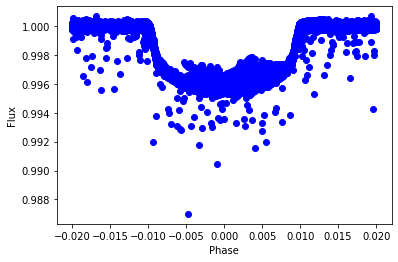

In [61]:
kepler_transits.plot(h11, phase=True)

In [65]:
tess_lcs = LightCurve(tes.time + 2457000, tes.flux)
tess_masked = LightCurve(**tess_lcs.mask_out_of_transit(h11, oot_duration_fraction=0.5))
tess_transits = tess_masked.get_transit_light_curves(h11)

for lc in tess_transits:
    lc.remove_polynomial_baseline(h11)

tess_transits = concatenate_transit_light_curves(tess_transits)

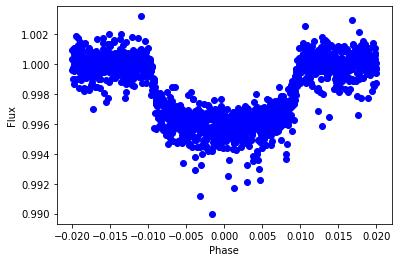

In [66]:
tess_transits.plot(h11, phase=True)

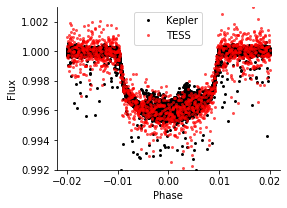

In [83]:
plt.figure(figsize=(4, 3))
kepler_transits.plot(h11, phase=True, show=False, plot_kwargs=dict(color='k', marker='.', ls='none', rasterized=True, mec='none', label='Kepler'))
tess_transits.plot(h11, phase=True, show=False, plot_kwargs=dict(color='r', marker='.', ls='none', rasterized=True, alpha=0.7, mec='none', label='TESS'))
plt.ylim([0.992, 1.003])

ax = plt.gca()
plt.legend()
for s in ['right', 'top']: 
    ax.spines[s].set_visible(False)
plt.savefig('plots/comparison_lc.pdf', bbox_inches='tight', dpi=300)